Bachu SaiPreetham

#Question1

Link: https://www.kaggle.com/uciml/iris

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# Implementation of the Multiclass Classification Logistic Regression from Scratch
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import StandardScaler

# PART A
df = pd.read_csv("Iris.csv")
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
# Independent variable = All col - {Species} = X
# Dependent variable = target = Y

X, Y = df.drop(columns = ["Id", "Species"]), df['Species']
# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("Independent Features : ",np.around(X,2))

for i in range(len(Y)):
  if Y.iat[i] == "Iris-setosa":
    Y.iat[i] = 0
  if Y.iat[i] == "Iris-versicolor":
    Y.iat[i] = 1
  if Y.iat[i] == "Iris-virginica":
    Y.iat[i] = 2
print("Dependent Feature : ",Y)

Independent Features :  [[-0.9   1.03 -1.34 -1.31]
 [-1.14 -0.12 -1.34 -1.31]
 [-1.39  0.34 -1.4  -1.31]
 [-1.51  0.11 -1.28 -1.31]
 [-1.02  1.26 -1.34 -1.31]
 [-0.54  1.96 -1.17 -1.05]
 [-1.51  0.8  -1.34 -1.18]
 [-1.02  0.8  -1.28 -1.31]
 [-1.75 -0.36 -1.34 -1.31]
 [-1.14  0.11 -1.28 -1.44]
 [-0.54  1.49 -1.28 -1.31]
 [-1.26  0.8  -1.23 -1.31]
 [-1.26 -0.12 -1.34 -1.44]
 [-1.87 -0.12 -1.51 -1.44]
 [-0.05  2.19 -1.46 -1.31]
 [-0.17  3.11 -1.28 -1.05]
 [-0.54  1.96 -1.4  -1.05]
 [-0.9   1.03 -1.34 -1.18]
 [-0.17  1.73 -1.17 -1.18]
 [-0.9   1.73 -1.28 -1.18]
 [-0.54  0.8  -1.17 -1.31]
 [-0.9   1.49 -1.28 -1.05]
 [-1.51  1.26 -1.57 -1.31]
 [-0.9   0.57 -1.17 -0.92]
 [-1.26  0.8  -1.06 -1.31]
 [-1.02 -0.12 -1.23 -1.31]
 [-1.02  0.8  -1.23 -1.05]
 [-0.78  1.03 -1.28 -1.31]
 [-0.78  0.8  -1.34 -1.31]
 [-1.39  0.34 -1.23 -1.31]
 [-1.26  0.11 -1.23 -1.31]
 [-0.54  0.8  -1.28 -1.05]
 [-0.78  2.42 -1.28 -1.44]
 [-0.42  2.65 -1.34 -1.31]
 [-1.14  0.11 -1.28 -1.44]
 [-1.02  0.34 -1.46 -1.31]
 [-0

In [ ]:
# Split a dataset into 80/20 train/test set
from random import randrange

def train_test_split(x, y, split):
  x_train, y_train = list(),list()
  train_size = split * len(x)
  x_test, y_test = list(x), list(y)
  while len(x_train) < train_size:
    idx = randrange(len(x_test))
    x_train.append(x_test.pop(idx))
    y_train.append(y_test.pop(idx))
  return np.array(x_train), np.array(x_test), np.array(y_train), np.array(y_test)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,0.8)

print("Independent Testing Feature :-\n",np.around(X_test,2))
print("Dependent Testing Feature :-\n",Y_test)

l = np.ones([len(X_train),1])
X_train = np.append(l, X_train, axis = 1)
l = np.ones([len(X_test),1])
X_test = np.append(l, X_test, axis = 1)

Independent Testing Feature :-
 [[-1.51  0.11 -1.28 -1.31]
 [-0.54  1.96 -1.17 -1.05]
 [-1.02  0.8  -1.28 -1.31]
 [-1.75 -0.36 -1.34 -1.31]
 [-1.26  0.8  -1.06 -1.31]
 [-1.26  0.11 -1.23 -1.31]
 [-0.42  1.03 -1.4  -1.31]
 [-1.63 -1.74 -1.4  -1.18]
 [ 1.4   0.34  0.54  0.26]
 [-0.42 -1.74  0.14  0.13]
 [-0.17 -0.59  0.42  0.13]
 [ 0.92 -0.36  0.48  0.13]
 [ 0.19 -1.98  0.14 -0.26]
 [ 0.31 -0.36  0.54  0.26]
 [-0.29 -0.12  0.42  0.4 ]
 [-0.05 -0.82  0.19 -0.26]
 [-0.42 -1.51 -0.03 -0.26]
 [-0.05 -0.82  0.08  0.  ]
 [-0.54 -0.12  0.42  0.4 ]
 [-0.42 -1.28  0.14  0.13]
 [-0.05 -1.05  0.14  0.  ]
 [-0.9  -1.28 -0.43 -0.13]
 [ 1.16 -0.12  0.99  1.19]
 [ 0.67  0.34  0.88  1.45]
 [ 2.25  1.73  1.67  1.32]
 [ 0.19 -1.98  0.71  0.4 ]
 [ 0.43 -0.59  0.59  0.79]
 [ 0.67 -0.59  1.05  1.19]
 [ 0.31 -1.05  1.05  0.26]
 [ 0.19 -0.12  0.59  0.79]]
Dependent Testing Feature :-
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]


In [ ]:
# Implement the logic of the algorithm using Gradient Descent Function

# Estimate linear regression coefficients using stochastic gradient descent

from math import exp

# Make a prediction with coefficients

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

def Gradient_Descent(x_train, y_train, alpha, epochs):
  y_train = y_train.reshape(len(y_train), 1)
  coef = np.zeros([len(x_train[0]),1])
  for e in range(epochs):
    cost = 0
    h_x = sigmoid(np.dot(x_train, coef))
    cost = np.sum(-(y_train * np.log(h_x) + (1 - y_train) * np.log(1 - h_x)))
    
    # Updating theta
    coef[0] = coef[0] - alpha * np.sum(h_x - y_train)
    for i in range(1,len(coef)):
      coef[i] = coef[i] - alpha * np.sum((h_x - y_train) * x_train[:,i].reshape(-1,1))
  return coef

# Finding coefficients
coef = []
epochs = 500
alpha = 0.01
y_train_unique = set(Y_train)

for i in y_train_unique:
  y_train_curr = np.where((Y_train == i), 1, 0)
  coef.append(Gradient_Descent(X_train, y_train_curr, alpha, epochs))
print(coef)

[array([[-3.1107126 ],
       [-1.29032783],
       [ 2.5862378 ],
       [-2.82081474],
       [-2.65536711]]), array([[-1.04372485],
       [-0.0506466 ],
       [-1.3977698 ],
       [ 1.68665917],
       [-1.7372678 ]]), array([[-6.4963935 ],
       [-0.64044045],
       [-0.62229856],
       [ 4.50653551],
       [ 5.86094909]])]


In [ ]:
Y_pred = []
for i in range(len(X_test)):
  pred = 0
  for j in range(len(coef)):
    y = np.sum(sigmoid(np.dot(X_test[i], coef[j])))
    if y > pred:
      pred = y
      prediction = j
  Y_pred.append(prediction)

accuracy = 0

for i in range(len(Y_test)):
  if Y_test[i] == Y_pred[i]:
    accuracy += 1

print("Accuracy is", (accuracy / len(Y_test)) * 100)
print("Testing Data\t",Y_test)
print("Predicted Data\t",np.array(Y_pred))

Accuracy is 93.33333333333333
Testing Data	 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2]
Predicted Data	 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 2]


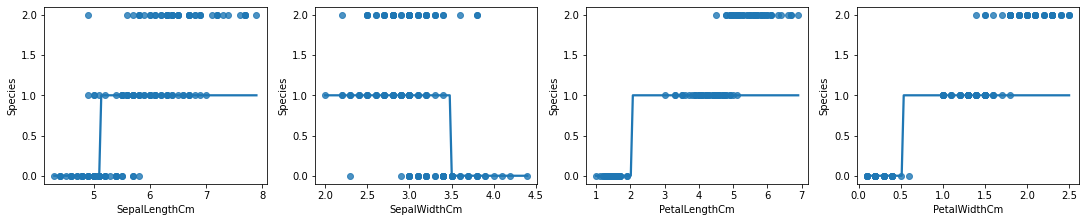

In [ ]:
# Train the model and plot the data
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

col = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
x = df.drop('Species', axis = 1)
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize=(15, 3))
axs = axs.flatten()
for i,k in enumerate(col):
  sns.regplot(x = x[k], y = Y.astype(float),scatter= True, logistic = True, ci = None,ax = axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)